# Modelos de 1, 3 y 5 factores 

Fuente :  https://www.pwlcapital.com/wp-content/uploads/2020/12/Five-Factor-Investing-with-ETFs.pdf%20z

## 5 factor model

$$Stock = \sum_{t=1} \frac{E(d_{t+1})}{(1+r)^t}$$


*Miller Modigliani Proposition*

Los dividendos no importan, en realidad son solo dinero que tiene la empresa. De las ganancias vienen las inversiones en equipo, etc. 

$$E(d_{t+1}) = E(Profits_{t+1} - dB_{t+1}) $$


Juntando todo
$$Stock = \sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}$$

Escalando por el valor en libros:

$$\frac{Stock}{B_t} = \frac{\sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}}{B_t}$$


$r$ es lo que imorta


1- *Value premium*: 1- Si dejamos todo constante, excepto $r$ y $\frac{stock}{B_t}$ significa que empresas con precio bajo necesariamente tienen mejor $r$

2-  *Profitability premium*: Si dejamos todo constante excepto $Profits_{t+1}$  y $r$ significa que las empresas que ganan más deben tener mejor $r$

3- *Investment premium* Si dejamos todo constante excepto $dB_{t+1}$ y $r$ entonces las compañias que gastan menos, tienen un mayor $r$


Instalar paquete

In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Descargar factores

import pandas_datareader.data as web
import datetime
from sklearn.metrics import r2_score
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Definir las fechas de inicio y fin
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Descargar los factores Fama-French desde la web de Ken French
ff_factors = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)

# ff_factores.head()

In [15]:
factors_df = ff_factors[0] / 100
factors_df.index = factors_df.index.to_timestamp()
factors_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1980-01-01,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0080
1980-02-01,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0089
1980-03-01,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,0.0121
1980-04-01,0.0397,0.0105,0.0106,-0.0210,0.0029,0.0126
1980-05-01,0.0526,0.0211,0.0038,0.0034,-0.0031,0.0081


In [18]:
factors_df.mean() * 12

Mkt-RF    0.083853
SMB       0.010347
HML       0.025028
RMW       0.047217
CMA       0.031876
RF        0.039158
dtype: float64

Estos son restas de rendimientos, si hubieramos invertido en el 1980 tendriamos el 80% de rendimiento

In [20]:
np.mean(factors_df.RMW > 0)

0.5916030534351145

In [ ]:
# Escalar y transformar factores


In [22]:
# Descargar acciones
tickers = ['BRK-A', 'SPY', 'VB', 'VGT',
          'AAPL', 'AMZN', 'MSFT', 'WMT']
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


In [31]:
# Ejemplo merge
df1 = pd.DataFrame({
    'user_id': ['A', 'B', 'D'],
    'monto': [1000, 2000, 3000]
})
df2 = pd.DataFrame({
    'user_id': ['A','E', 'D', 'Z' ],
    'monto': [1000, 1500, 3000, 3000]
})

In [32]:
df1

,user_id,monto
0,A,1000
1,B,2000
2,D,3000


In [33]:
df2

,user_id,monto
0,A,1000
1,E,1500
2,D,3000
3,Z,3000


In [36]:
 
df3 = pd.merge(df1, df2, on='user_id')
df3

,user_id,monto_x,monto_y
0,A,1000,1000
1,D,3000,3000


In [37]:
# Juntar datos
df = pd.merge(rt, factors_df, on='Date')
df.head()

,AAPL,AMZN,BRK-A,MSFT,SPY,VB,VGT,WMT,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,
2004-03-01,0.130434,0.006278,-0.012698,-0.060309,-0.016693,0.008001,-0.025820,0.002183,-0.0132,0.0210,0.0027,0.0156,-0.0098,0.0009
2004-04-01,-0.046598,0.007394,0.000965,0.048135,-0.015481,-0.047024,-0.054312,-0.042920,-0.0183,-0.0201,-0.0310,0.0345,-0.0284,0.0008
2004-05-01,0.088440,0.112385,-0.047007,0.003827,0.017123,0.021029,0.049162,-0.022281,0.0117,-0.0038,-0.0025,-0.0118,0.0003,0.0006
2004-06-01,0.159658,0.121650,-0.000562,0.088829,0.014797,0.037724,0.020144,-0.055734,0.0186,0.0256,0.0118,0.0120,-0.0039,0.0008
2004-07-01,-0.006145,-0.284559,-0.019112,-0.002451,-0.028686,-0.061112,-0.084782,0.009714,-0.0406,-0.0295,0.0324,0.0532,-0.0166,0.0010


### Crea el CAPM con el S&P500, ¿Qué concluyes?




In [49]:
spy_f = df.copy()
spy_f['spy_minus_rf'] = spy_f['SPY'] - spy_f['RF']

X = spy_f[['Mkt-RF']]
y = spy_f[['spy_minus_rf']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.9794430960404742

In [53]:
predictions

array([[-0.01277648],
       [-0.01773022],
       [ 0.01140944],
       [ 0.01811156],
       [-0.0393907 ],
       [ 0.00082203],
       [ 0.01558613],
       [ 0.01393488],
       [ 0.04414299],
       [ 0.03336132],
       [-0.02676352],
       [ 0.01840296],
       [-0.01909007],
       [-0.02530653],
       [ 0.03549823],
       [ 0.00558151],
       [ 0.0381208 ],
       [-0.01180516],
       [ 0.00480445],
       [-0.01957573],
       [ 0.0351097 ],
       [-0.00238333],
       [ 0.02957316],
       [-0.00286899],
       [ 0.01422628],
       [ 0.00713562],
       [-0.03463122],
       [-0.00335465],
       [-0.00753134],
       [ 0.01976281],
       [ 0.0179173 ],
       [ 0.03141868],
       [ 0.01665458],
       [ 0.00849548],
       [ 0.01364348],
       [-0.01899294],
       [ 0.00664996],
       [ 0.03394411],
       [ 0.03151581],
       [-0.01899294],
       [-0.03618534],
       [ 0.00898114],
       [ 0.03132154],
       [ 0.01752877],
       [-0.04686988],
       [-0

# Ahora con Berkshiere

In [47]:
# Accion minus RF 
brk_f = df.copy()
brk_f['brk_minus_rf'] = brk_f['BRK-A'] - brk_f['RF']

X = brk_f[['Mkt-RF']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.35507832163244357

In [59]:
# CAPM


# Calcular R2

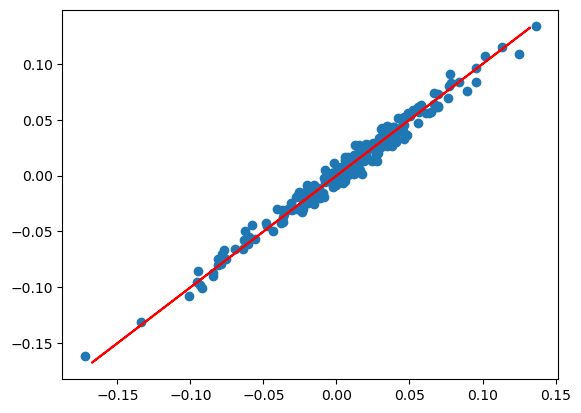

In [61]:
# Plot CAPM 
plt.scatter(X['Mkt-RF'], y)
plt.plot(X['preds'], predictions, 'red')

## Fama french con Berkshiere

Este es el bueno $\downarrow$

In [62]:
brk_f = df.copy()
brk_f['brk_minus_rf'] = brk_f['BRK-A'] - brk_f['RF']

X = brk_f[['Mkt-RF', 'SMB', 'HML']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)


0.44050712135492487

# 5 factor model con Berkshiere

In [64]:
df.keys()

Index(['AAPL', 'AMZN', 'BRK-A', 'MSFT', 'SPY', 'VB', 'VGT', 'WMT', 'Mkt-RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF'],
      dtype='object')

In [63]:
# 5 factor model
brk_f = df.copy()
brk_f['brk_minus_rf'] = brk_f['BRK-A'] - brk_f['RF']

X = brk_f[['Mkt-RF', 'SMB', 'HML', 'CMA', 'RMW']]
y = brk_f[['brk_minus_rf']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)



0.44143963514647044

In [66]:
# Correr todos los modelos
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']] 

    # CAPM 
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model 
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}
    
    
    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}
    
    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary


In [67]:
# Como es con CAPM
run_all_models(df, 'AMZN')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.220683803946305]},
  'R2': 0.2572202565068963},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3492741812514422,
    0.013170724476087026,
    -1.221057534197914]},
  'R2': 0.38671981754956797},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2959775241703213,
    -0.11994268075022402,
    -0.9723496421507536,
    -0.3297518771196558,
    -0.571662914053299]},
  'R2': 0.39612186474508215}}

In [68]:
# Como es con 3 factors
run_all_models(df, 'AMZN')['3 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3492741812514422,
   0.013170724476087026,
   -1.221057534197914]},
 'R2': 0.38671981754956797}

In [69]:
# Como es con 5 factors
run_all_models(df, 'AMZN')['5 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2959775241703213,
   -0.11994268075022402,
   -0.9723496421507536,
   -0.3297518771196558,
   -0.571662914053299]},
 'R2': 0.39612186474508215}

## Crea un portafolio con 50% apple y 50% amazon
¿Qué concluyes?

In [76]:
df['apple_amazon'] = 0.5*df['AAPL'] + 0.5*df['AMZN']

run_all_models(df, 'apple_amazon')['5 factor']

{'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2975870469320332,
   -0.119102695081022,
   -0.7196262574698715,
   0.1227548763384915,
   -0.521043448089101]},
 'R2': 0.5466869671392538}

## Crea un portafolio con (1/3) apple, (1/3) amazon 6(1/3) microsoft
¿Qué concluyes?


In [75]:
df['apple_amazon_microsoft'] = (1/3)*df['AAPL'] + (1/3)*df['AMZN'] + (1/3)*df['MSFT']

run_all_models(df, 'apple_amazon_microsoft')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1174481728888543]},
  'R2': 0.5059470095691505},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.2524513475420533,
    -0.27372028344728894,
    -0.6844687110987218]},
  'R2': 0.6252348868277919},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2182319298812425,
    -0.2822797967025907,
    -0.5222116952619037,
    0.06782967500304883,
    -0.4361537595598877]},
  'R2': 0.634366187861781}}

## Crea un portafolio con (1/4) apple, (1/4) amazon, (1/4) microsoft, (1/4) Walmart
¿Qué concluyes?


In [78]:
df['apple_amazon_microsoft_wmt'] = (1/4)*df['AAPL'] + (1/4)*df['AMZN'] + (1/4)*df['MSFT'] + (1/4)*df['WMT']

run_all_models(df, 'apple_amazon_microsoft_wmt')

{'CAPM': {'BETAS': {"['Mkt-RF']": [0.9316158724442107]},
  'R2': 0.541362239268449},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0612294489738874,
    -0.3318762983062421,
    -0.5135978399990202]},
  'R2': 0.6647085032707427},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.04678877224924,
    -0.304418495029195,
    -0.4440856222234327,
    0.14156063636981855,
    -0.21197981741711763]},
  'R2': 0.6697415774341724}}

In [79]:
run_all_models(df, 'VGT')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1319540850866452]},
  'R2': 0.8248196367345543},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.1783775055411767,
    -0.019058862379583014,
    -0.3913420616684876]},
  'R2': 0.8756242444627612},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.167327994898082,
    -0.04203035466612651,
    -0.3396249779097483,
    -0.05155047023394432,
    -0.12267468139911887]},
  'R2': 0.8770090748110764}}

In [80]:
# empresas chicas
run_all_models(df, 'VB')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1851298366836882]},
  'R2': 0.8921476392065555},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.038466989187021,
    0.6251046591564107,
    0.06257815442948292]},
  'R2': 0.9690168493579645},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0318840767683357,
    0.6121898693807271,
    0.09341517208309441,
    -0.027910099684744255,
    -0.07377801118229835]},
  'R2': 0.9694934271284718}}